# Decision Trees
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [4]:
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 6.0)

### Importando los datos

Para este ejercicio utilizaré el dataset ecoli encontrado en http://archive.ics.uci.edu/ml/datasets/Ecoli, consiste de 7 variables explicativas (números reales) y una variable target (predictiva) como se explica en http://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.names
       

In [5]:
ecoli_names = ['name', 'mcg', 'gvh', 'lip','chg', 'aac', 'alm1', 'alm2', 'clase']

In [6]:
ecoli=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', 
                  names=ecoli_names, sep='\s+')

### Observamos el head del dataset

In [7]:
ecoli.head()

,name,mcg,gvh,lip,chg,aac,alm1,alm2,clase
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


### Eliminamos la primera columna ya que como dice la información del dataset, las variables predictivas son las numéricas.

In [8]:
ecoli.drop(['name'], axis=1, inplace=True)
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,clase
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


### Separamos en train y test

In [9]:
X = ecoli.iloc[:,0:7]
Y = ecoli.iloc[:,7]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

### Entrenamos el modelo

In [10]:
classifier = DecisionTreeClassifier() 
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Calculamos las predicciones sobre el set de test

In [11]:
Y_predict = classifier.predict(X_test)
Y_predict

array(['cp', 'imU', 'im', 'cp', 'cp', 'imU', 'cp', 'cp', 'cp', 'im', 'imU',
       'pp', 'im', 'im', 'cp', 'cp', 'cp', 'im', 'om', 'cp', 'cp', 'cp',
       'cp', 'im', 'cp', 'im', 'imU', 'cp', 'imU', 'pp', 'im', 'pp', 'im',
       'im', 'im', 'cp', 'cp', 'pp', 'pp', 'cp', 'pp', 'imU', 'pp', 'cp',
       'pp', 'pp', 'pp', 'cp', 'im', 'pp', 'om', 'om', 'cp', 'cp', 'pp',
       'im', 'cp', 'cp', 'im', 'imU', 'cp', 'im', 'im', 'im', 'cp', 'cp',
       'im', 'pp', 'cp', 'imS', 'cp', 'cp', 'cp', 'pp', 'cp', 'imU', 'cp',
       'im', 'pp', 'cp', 'cp', 'cp', 'cp', 'cp'], dtype=object)

### Revisamos las métricas de desempeño

In [12]:
print "Accuracy: ", str(accuracy_score(Y_test,Y_predict)*100)

Accuracy:  80.9523809524


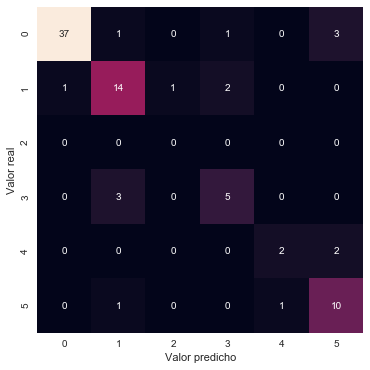

In [13]:
matriz_conf = confusion_matrix(Y_test, Y_predict)
sns.heatmap(matriz_conf, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

### Dibujando el árbol

In [14]:
arbol_viz = graphviz.Source(tree.export_graphviz(classifier, out_file=None))

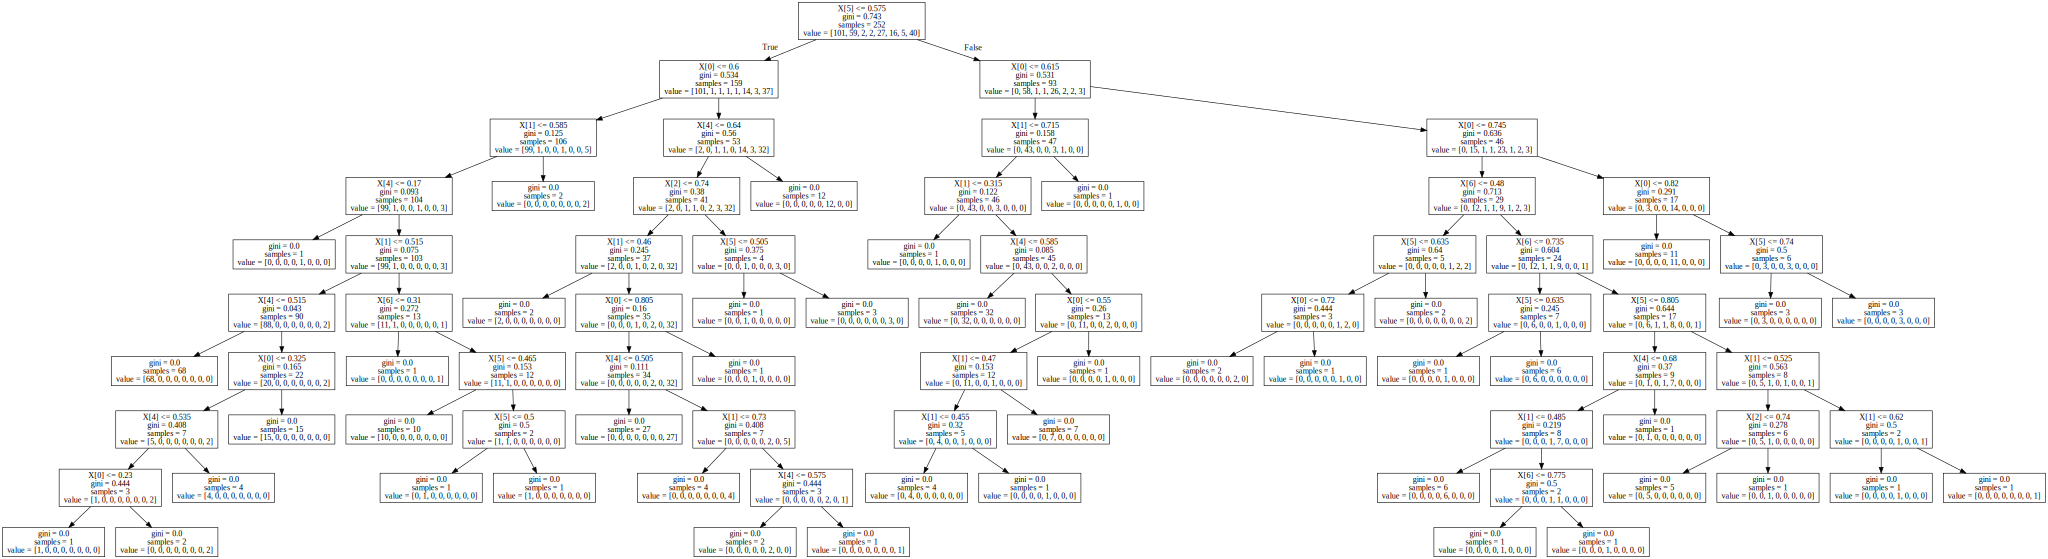

In [15]:
arbol_viz